In [1]:
import pandas as pd
import numpy as np

In [2]:
ins = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
ins

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
ins['_c39'].unique()

array([nan])

In [5]:
#column '_c39' can be removed since it only has null values.

ins.drop(['_c39'], 1, inplace = True)

### Null values check:

In [6]:
ins.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

No null values are present in the dataset.

In [7]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

There are quite no.of object datatype columns which needs to be converted to numerical for model training.

## Data Visualization

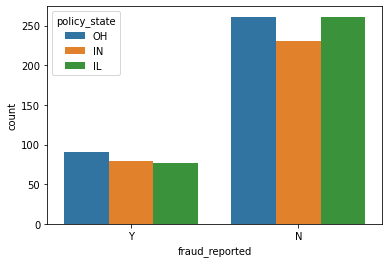

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=ins['fraud_reported'],hue=ins['policy_state'],data=ins)

With 'OH' policy state, there are more cases of frauds which have been reported.

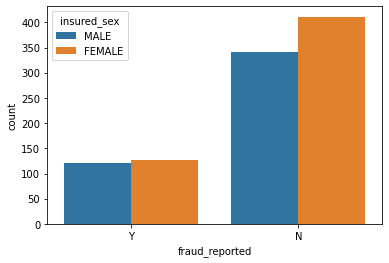

In [10]:
sns.countplot(x=ins['fraud_reported'],hue='insured_sex',data=ins)

The ratio is almost similar and that means, gender doesn't really the constraint to look for.

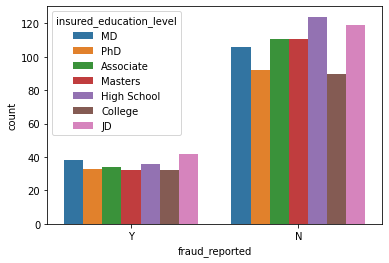

In [11]:
sns.countplot(x=ins['fraud_reported'],hue=ins['insured_education_level'],data=ins)

Almost all the education levels insured people seems like commiting the crime.
m
To be specific, 'MD' and 'JD' education level insured people have higher rate of commiting the fraud.

As the education background does seem to groom people, we'll look into this in detailed later.

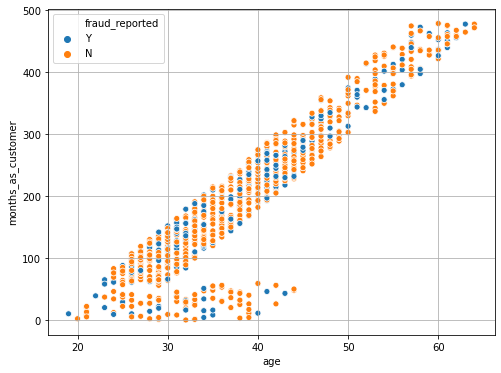

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='months_as_customer',hue='fraud_reported',data=ins)
plt.grid(True)
plt.show()

There is no viable pattern which justifies if customers with more years with the company are claiming fraud insurance.

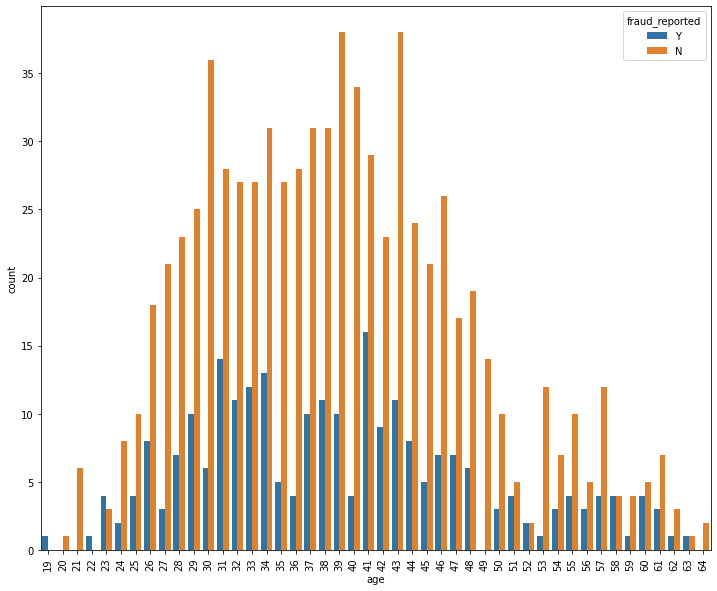

In [13]:
plt.figure(figsize=(12,10))
sns.countplot(x='age',hue='fraud_reported',data=ins)
plt.xticks(rotation=90)
plt.show()

If age above 25(Adults) is taken into consideration then the count seems to be more in 40's and 30's.

Age factor can be varying from time to time whilst frauds since it only depends on the individuals and not on their age.

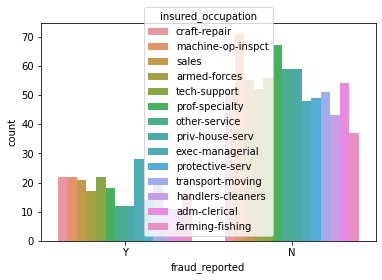

In [14]:
sns.countplot(x=ins['fraud_reported'],hue='insured_occupation',data=ins)

Occupation does play a role in making people commit frauds as money depravity brings the worst out of people.

We'll look into this variable in coming steps

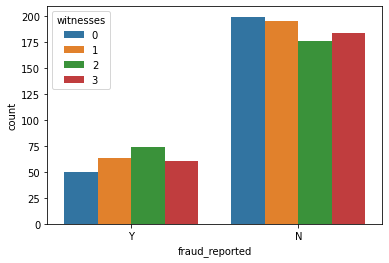

In [15]:
sns.countplot(x=ins['fraud_reported'],hue='witnesses',data=ins)

In [16]:
a=ins[ins['fraud_reported'] == 'Y']

a[['policy_number','insured_occupation','insured_education_level','total_claim_amount']].sort_values('total_claim_amount',ascending=False)[:20]

,policy_number,insured_occupation,insured_education_level,total_claim_amount
149,217938,craft-repair,JD,112320
163,346940,prof-specialty,Masters,107900
479,753844,sales,MD,104610
145,515050,exec-managerial,Associate,99320
247,187775,other-service,JD,98670
91,127754,tech-support,Associate,98340
974,291006,transport-moving,JD,98280
23,115399,priv-house-serv,MD,98160
41,616337,transport-moving,Associate,97080
796,728025,machine-op-inspct,Masters,92730


We have top 20 fraud claims with policy number and their occupation listed Policy number 217938 has claimed highest amount of 112320$ and is working as craft-repair

In [17]:
a['insured_education_level'].value_counts()
a['insured_occupation'].value_counts()

exec-managerial      28
machine-op-inspct    22
craft-repair         22
tech-support         22
transport-moving     21
sales                21
prof-specialty       18
armed-forces         17
farming-fishing      16
protective-serv      14
priv-house-serv      12
other-service        12
handlers-cleaners    11
adm-clerical         11
Name: insured_occupation, dtype: int64

People who are working as exec-manager has claimed more fraud transactions

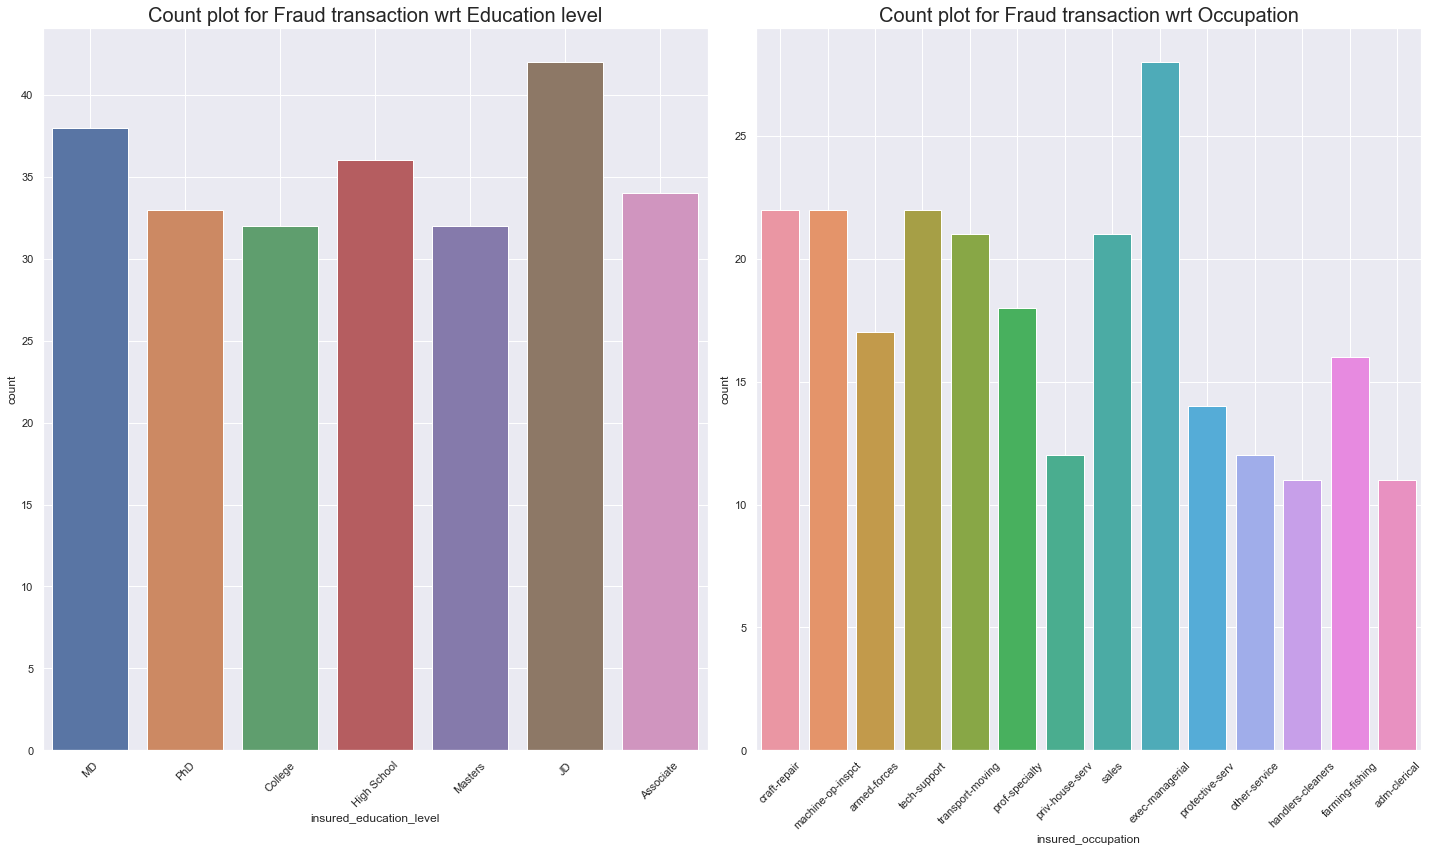

In [18]:
sns.set(style="darkgrid")

plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
plt.title("Count plot for Fraud transaction wrt Education level",fontsize=20)
sns.countplot('insured_education_level',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Count plot for Fraud transaction wrt Occupation",fontsize=20)
sns.countplot('insured_occupation',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

People with occupation as Exec Manager seems to be doing more fraud transactions and people with JD level of education are also involved in more fraud transactions. Comparitively people with less education are claiming more fraud claims.

In [22]:
#Looking at below claims
a_claims=pd.pivot_table(a,values='total_claim_amount',index=['insured_occupation','insured_education_level']).sort_values('total_claim_amount',ascending=False)

a_claims

,,total_claim_amount
insured_occupation,insured_education_level,
protective-serv,JD,87890.000000
handlers-cleaners,Associate,85900.000000
priv-house-serv,MD,81353.333333
other-service,JD,81135.000000
tech-support,Associate,80113.333333
...,...,...
craft-repair,High School,30528.000000
priv-house-serv,PhD,28600.000000
adm-clerical,High School,24693.333333


People from occupation sector Protective-services and education level of JD has highest fraud claimed amount of 87,890$

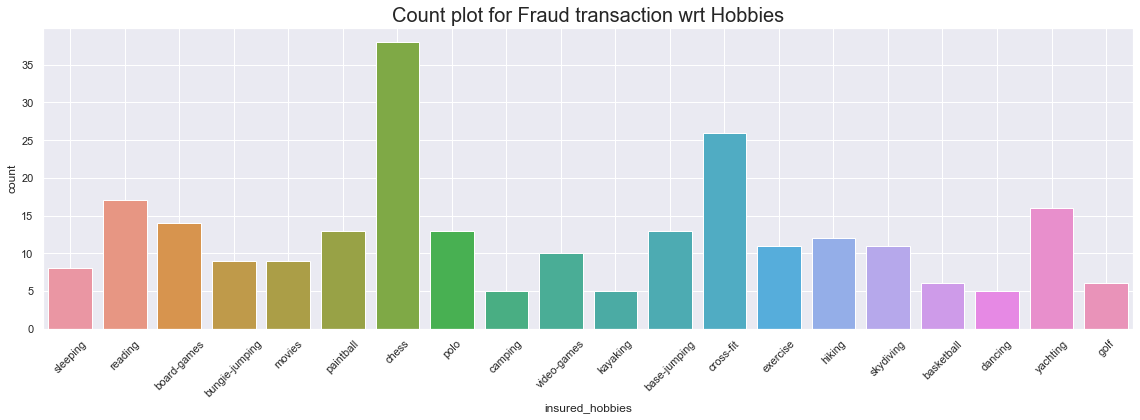

In [23]:
plt.figure(figsize=(16,6))
plt.title("Count plot for Fraud transaction wrt Hobbies",fontsize=20)
sns.countplot('insured_hobbies',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

People who play more chess have claimed more fraud.

Chess is a tactical game. Commiting fraud in something like insurance which has tight knits and protocols is not easy unless if one has tactics in his arsenal.

#### Let's look into the accident style or incident/collision for claiming insurance money

In [25]:
ins.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [26]:
ins[['incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved']]

,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved
0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1
1,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1
2,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3
3,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1
4,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1
...,...,...,...,...,...,...,...,...,...,...
995,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1
996,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1
997,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3
998,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1


In [27]:
pd.pivot_table(a,values=['number_of_vehicles_involved','total_claim_amount','vehicle_claim','incident_hour_of_the_day'],index=['incident_type','collision_type']).sort_values('vehicle_claim',ascending=False)

incident_hour_of_the_day  \
incident_type            collision_type                              
Single Vehicle Collision Front Collision                 11.595238   
                         Side Collision                  11.787879   
                         Rear Collision                  11.071429   
Multi-vehicle Collision  Side Collision                  11.432432   
                         Front Collision                 11.892857   
                         Rear Collision                  14.142857   
Parked Car               ?                                7.000000   
Vehicle Theft            ?                                5.375000   

                                          number_of_vehicles_involved  \
incident_type            collision_type                                 
Single Vehicle Collision Front Collision                     1.000000   
                         Side Collision                      1.000000   
                         Rear Collision                      1.000000   
Multi-vehicle Collision  Side Collision                      2.972973   
                         Front Collision                     2.964286   
                         Rear Collision                      3.081633   
Parked Car               ?                                   1.000000   
Vehicle Theft            ?                                   1.000000   

                                          total_claim_amount  vehicle_claim  
incident_type            collision_type                                      
Single Vehicle Collision Front Collision        66596.190476   49030.000000  
                         Side Collision         68009.696970   48481.212121  
                         Rear Collision         65782.857143   47616.666667  
Multi-vehicle Collision  Side Collision         62281.621622   45308.648649  
                         Front Collision        60970.000000   43860.000000  
                         Rear Collision         61152.448980   43474.693878  
Parked Car               ?                       5093.750000    3711.250000  
Vehicle Theft            ?                       5197.500000    3665.000000

For auto claims, single vehicle side collision have claimed highest

For collision type we have few '?' values, which are nan values and has to be replaced/removed

In [33]:
ins

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [32]:
ins['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

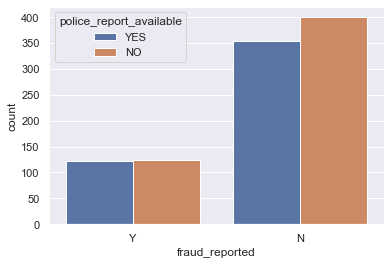

In [40]:
sns.countplot(x=ins['fraud_reported'],hue='police_report_available',data=ins)

#The data refining needs to be done by removing the na

In [34]:
ins['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [35]:
ins['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

#### Filling na values

In [37]:
ins['police_report_available']=ins['police_report_available'].replace({'?':np.nan})

ins['police_report_available']=ins['police_report_available'].fillna(method='ffill')

#ffill method is used since the values are similar to its corresponding ones.

In [38]:
ins['collision_type']=ins['collision_type'].replace({'?':np.nan})

ins['collision_type']=ins['collision_type'].fillna(method='ffill')

In [39]:
ins['property_damage']=ins['property_damage'].replace({'?':np.nan})

ins['property_damage']=ins['property_damage'].fillna(method='ffill')

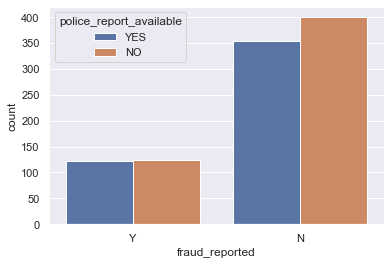

In [41]:
sns.countplot(x=ins['fraud_reported'],hue='police_report_available',data=ins)

In [42]:
#lets drop the unnecessary features as they don't help for fraud_reported

ins=ins.drop(['months_as_customer','policy_number','policy_bind_date','policy_csl','auto_year','auto_model','insured_hobbies','insured_zip'],axis=1)

### Over_Sample

In [48]:
#The data is imbalanced

ins['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [50]:
df_class_1 = ins[ins['fraud_reported']=='Y']

In [51]:
df_class_0 = ins[ins['fraud_reported']=='N']

In [52]:
ins.shape

(1000, 31)

In [56]:
df_class_1_over = df_class_1.sample(753, replace=True)

In [57]:
ins_bal = pd.concat([df_class_0, df_class_1_over], axis=0)

print(ins_bal.fraud_reported.value_counts())

Y    753
N    753
Name: fraud_reported, dtype: int64


The data is balance now.

### Label Encoder

In [65]:
#Dealing with the categorical features

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in list(ins_bal.columns):
    if ins_bal[i].dtype=='object':
        ins_bal[i]=le.fit_transform(ins_bal[i])

In [66]:
ins_bal

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
2,29,2,2000,1413.14,5000000,0,6,11,3,35100,...,0,2,3,0,34650,7700,3850,23100,4,0
4,44,0,1000,1583.91,6000000,1,0,11,4,66000,...,0,0,1,0,6500,1300,650,4550,0,0
6,34,1,1000,1333.35,0,1,6,9,0,0,...,0,0,0,0,78650,21450,7150,50050,9,0
7,37,0,1000,1137.03,0,1,0,12,4,0,...,0,2,2,1,51590,9380,9380,32830,1,0
8,33,0,500,1442.99,0,0,6,7,3,0,...,0,1,1,1,27700,2770,2770,22160,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,33,2,500,964.92,0,0,0,3,2,45700,...,0,2,1,0,35300,3530,3530,28240,8,1
272,47,0,2000,1083.01,0,1,4,2,2,91900,...,1,2,0,0,71760,11040,11040,49680,7,1
361,24,1,500,922.67,0,0,1,8,2,47400,...,1,2,1,1,65520,9360,9360,46800,12,1
513,38,0,1000,1437.53,0,0,1,13,1,0,...,0,0,2,0,53730,11940,5970,35820,4,1


### Data split for model training

In [67]:
x=ins_bal.drop(['fraud_reported'],axis=1)

In [68]:
y=ins_bal['fraud_reported']

In [69]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

### Standard Scaler

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)

In [71]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.056517,1.211463,1.375099,0.643215,1.665339,-0.920789,1.534845,1.080322,0.350891,0.378684,...,1.037291,-0.964764,1.197539,1.371145,-0.952013,-0.854631,-0.026398,-0.820147,-0.962072,-0.629344
1,0.559703,-1.221154,-0.233991,1.331811,2.094424,1.086025,-1.552613,1.080322,0.954136,1.488933,...,-0.885368,-0.964764,-1.233046,-0.465177,-0.952013,-1.990174,-1.363329,-1.477799,-2.007607,-1.638976
2,-0.517777,-0.004846,-0.233991,0.321478,-0.480085,1.086025,1.534845,0.587452,-1.458842,-0.882473,...,1.037291,-0.964764,-1.233046,-1.383339,-0.952013,0.920284,2.845917,-0.141943,0.556912,0.632696
3,-0.194533,-1.221154,-0.233991,-0.470143,-0.480085,1.086025,-1.552613,1.326757,0.954136,-0.882473,...,1.037291,-0.964764,1.197539,0.452984,1.050406,-0.171289,0.324547,0.316359,-0.413660,-1.386568
4,-0.625525,-1.221154,-1.038536,0.763579,-0.480085,-0.920789,1.534845,0.094581,0.350891,-0.882473,...,-0.885368,-0.964764,-0.017753,-0.465177,1.050406,-1.134987,-1.056253,-1.042104,-1.015053,1.389920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.625525,1.211463,-1.038536,-1.164142,-0.480085,-0.920789,-1.552613,-0.891159,-0.252353,0.759546,...,1.998621,-0.964764,1.197539,-0.465177,-0.952013,-0.828411,-0.897492,-0.885912,-0.672366,0.380288
1502,0.882947,-1.221154,1.375099,-0.687968,-0.480085,1.086025,0.505693,-1.137595,-0.252353,2.419531,...,1.998621,1.036523,1.197539,-1.383339,-0.952013,0.642349,0.671314,0.657516,0.536057,0.127880
1503,-1.595256,-0.004846,-1.038536,-1.334507,-0.480085,-0.920789,-1.038037,0.341017,-0.252353,0.820628,...,1.037291,1.036523,1.197539,-0.465177,1.050406,0.390633,0.320369,0.312248,0.373732,1.389920
1504,-0.086785,-1.221154,-0.233991,0.741563,-0.480085,-0.920789,-1.038037,1.573192,-0.855598,-0.882473,...,1.037291,-0.964764,-1.233046,0.452984,-0.952013,-0.084963,0.859320,-0.384452,-0.245134,-0.629344


In [72]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3)

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

In [74]:
#Hyperparamenter tuning

from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'], 'max_depth': np.arange(1,30)}

In [75]:
grid=GridSearchCV(rf,parameters)

grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [77]:
model=grid.best_estimator_

grid.best_score_

0.9117129316181449

In [78]:
y_pred=model.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8982300884955752

In [83]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(model,x_train,y_train,cv=10)

print(cross_val)


[0.89622642 0.91509434 0.96226415 0.9245283  0.93333333 0.91428571
 0.93333333 0.92380952 0.86666667 0.87619048]
Acccuracy of the model is : 0.9145732255166218


In [84]:
print("Acccuracy of the model is :", np.mean(cross_val))

Acccuracy of the model is : 0.9145732255166218


### Saving the Model

In [86]:
Fraud_detection = model.predict(x_test)

In [91]:
#lets make the dataframe for price_prediction

Fraud_detection = pd.DataFrame(Fraud_detection,columns=["fraud_reported"])

In [92]:
#Lets save the submission to csv

Fraud_detection.to_csv("Fraud_detection.csv",index=False)